# Set up

## Mise en place de l'environnement 

In [191]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from scipy import stats
from sklearn.linear_model import LinearRegression
import random as rd


import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/eda-prix-maison/eda-house-price")

## Import des données

In [192]:
df = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv")

# Etat des lieux de la donnée

## Affichage des 10 premières lignes

In [193]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Utilisation du .info()

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Gestion des valeurs manquants

On va supprimer les colonnes pour lesquelles il manque plus de 30% des valeurs.

In [195]:
df.dropna(axis=1, thresh=0.3*len(df), inplace=True)

In [196]:
df.shape

(1460, 77)

On a supprimé 4 colonnes. 

## Gestion des doublons

On va regarder s'il y a des doublons.

In [197]:
print(df.duplicated().value_counts())

False    1460
dtype: int64


Il n'y a pas de doublons. On a donc pas besoin d'en supprimer.

## Analyse de SalePrice

### Analyse des valeurs

On va regarder les valeurs présentes dans SalePrice à l'aide d'un describe().

In [198]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

On peut voir que les prix des maisons s'étendent de 34.900 à 755.000 ce qui semble cohérent. 

### Représentation graphique

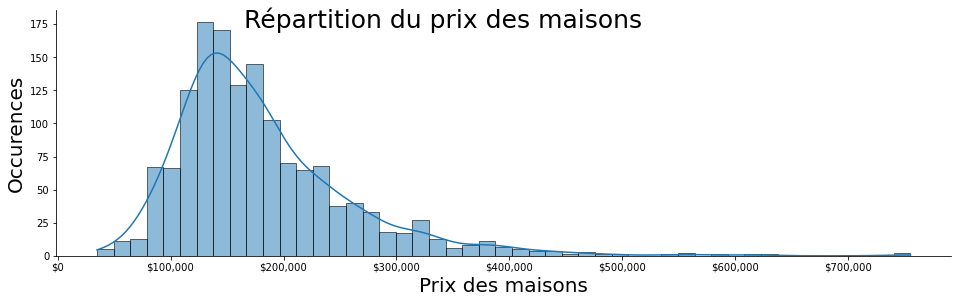

In [199]:
ax=sns.displot(x=df['SalePrice'], kde=True)

fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)
# Ajout du titre
fig.suptitle("Répartition du prix des maisons", fontsize=25)
# Ajout des labels pour les axes x et y
plt.xlabel("Prix des maisons", fontsize=20);
plt.ylabel("Occurences", fontsize=20, rotation=90);

# On garde en mémoire les limites en abscisse
left, right = plt.xlim()

# Modification du format des ticks en abscisse
ticks = ax.axes[0][0].get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(xlabels)

# On remet les limites précédentes en abscisse
plt.xlim(left, right);

In [200]:
stats.kurtosis(df['SalePrice'])

6.509812011089439

On constate qu'il y a peu de maisons en vente à partir de 500.000€. La répartition du prix des maisons s'approche d'une loi normale. L'ensemble des valeurs de ventes sont réparties de 35.000 à 780.000 USD avec la majorité des valeurs entre 100.000 et 250.000 USD.
On constate que cette courbe a une asymétrie positive, la distribution est décalée à gauche de la médiane et on observe une queue de distribution étalée sur la droite.
Comme le kurtosis le montre, on a une distribution plutôt pointue en sa moyenne et a des queues de distribution épaisses. 

## Etude des variables quantitatives

### Histogrammes des variables quantitatives

On va commencer par faire un subset contenant toutes les colonnes contenant des variables quantitatives. (sauf la colonne Id qui ne donnera pas de graphiques exploitables) 

In [201]:
# Création de la liste des variables quantitatives
quanti=[]

# On parcourt les colonnes
for column in df.columns.difference(['Id']):
    # On ajoute les variables quantitatives à notre subset
    if df[column].dtype in ["int64", "float64"]:
        quanti.append(column)
    
print("Liste des variables quantitatives:\n\n{}".format(quanti))
print("\nNombre de variables quantitatives: {}".format(len(quanti)))

Liste des variables quantitatives:

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

Nombre de variables quantitatives: 37


On peut maintenant faire nos histogrammes

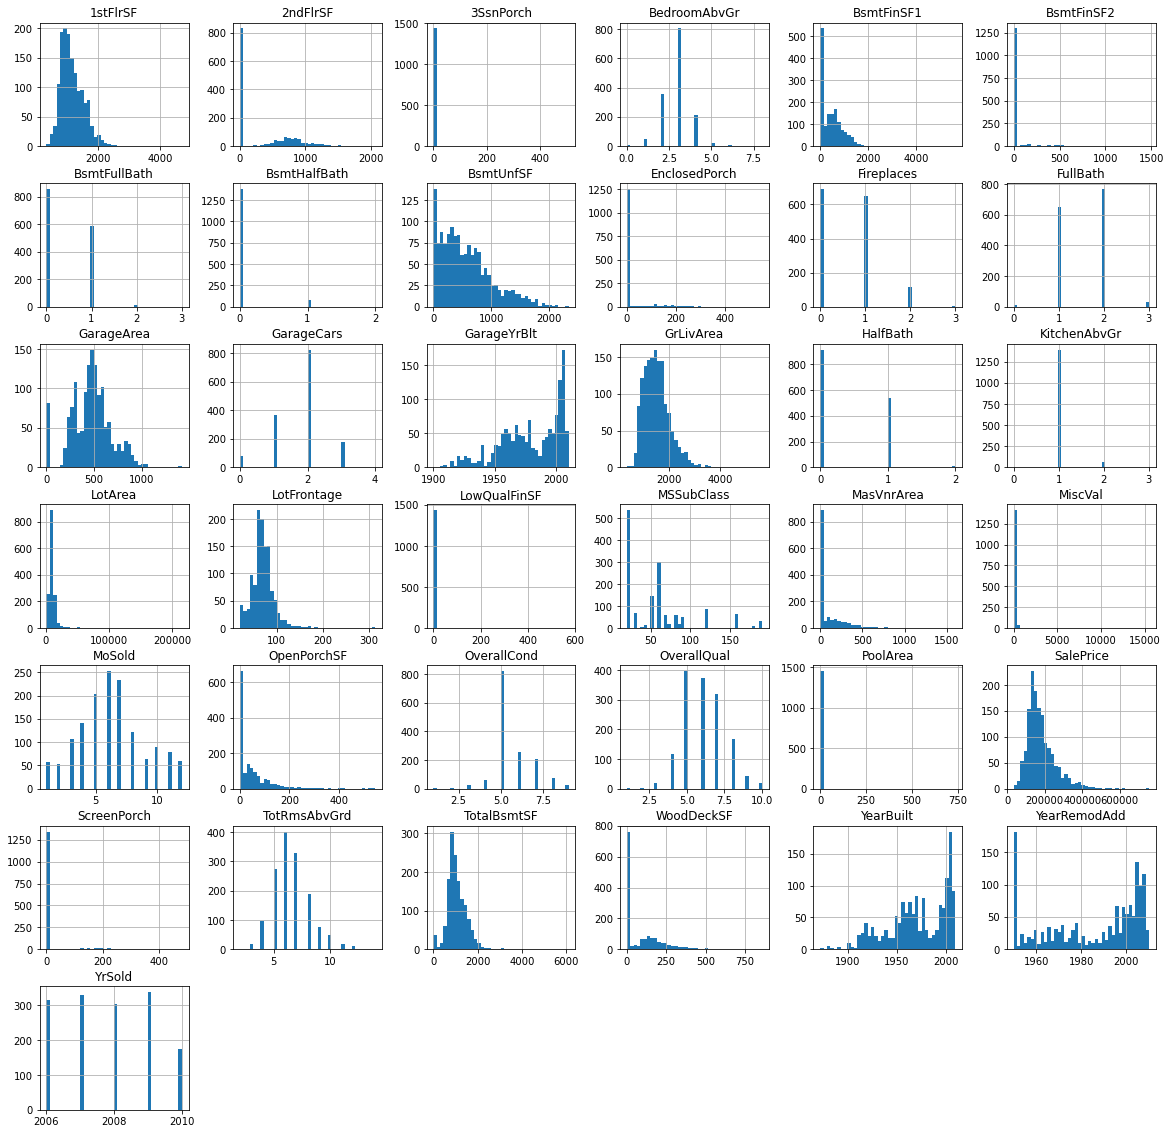

In [202]:
df[quanti].hist(figsize=(20,20), bins=40);

On constate que plusieurs variables ont des distributions semblables à celle du prix de vente des maisons. Ce sont des courbes avec une forte croissance dans les premières valeurs, un pic fort, et une décroissance plus lente et étalée.

Les colonnes en questions sont par exemple: 

1stFlrSF (superficie du rdc)
BedroomAbvGr (nombre de chambres en étage)
BsmtUnfSF (superficie unfinished du sous-sol)
GarageArea (superficie du garage)
GarageCars (nombre de voitures)
GrLiveArea (superficie en étage)
LotFrontage (longueur de rue connectée à la maison)
MsSubClass (type de logement)
MoSold (mois de vente)
TotalBsmtSF (superficie du sous-sol totale)
OverallQual (qualité globale)

On peut en conclure qu'il y a corrélation linéaire entre chacune des valeurs citées précédemment auxquelles on peut rajouter SalePrice. 

### Calcul des corrélations avec le prix de vente des maisons

In [203]:
# On travaille sur les valeur quantitatives (sauf SalePrice qui sera forcément correlée)
# On calcule la correlation avec SalePrice en triant les valeurs absolues pour ne conserver que les 10 plus grandes
listcorr = df.corrwith(df['SalePrice']).sort_values(ascending=False).abs().head(10).index
print(listcorr)
# [df[quanti].columns.difference(['SalePrice'])]

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


On a donc les 10 variables les plus correlées linéairement avec SalePrice (avec SalePrice inclus, son coefficient de corrélation avec lui-même sera évidemment de 1). 

### Représentation graphique des valeurs correlées

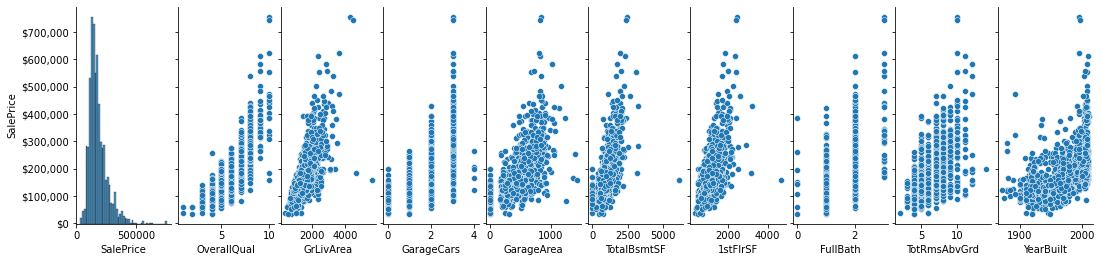

In [204]:
ax = sns.pairplot(data=df[listcorr],
                  y_vars= 'SalePrice');
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)

# on change le format de l'axe y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.axes[0][0].yaxis.set_major_formatter(tick) 

Pour les 3 variables les plus corrélées, on constate que plus la valeur en question augmente, plus le salaire moyene augmente. On pourrait tracer une droite croissante à partir de ces points.
Ces points se trouvent dans un cone centré autour d'une droite croissante.

### Visualisation des corrélations par heatmap

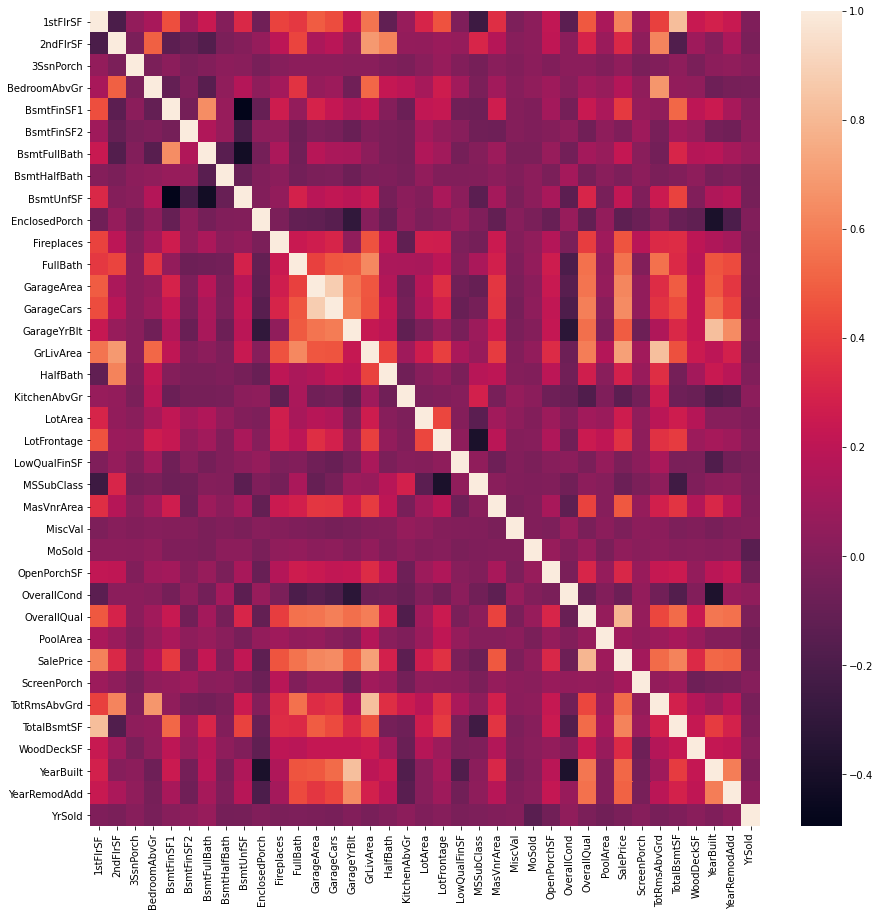

In [205]:
ax=sns.heatmap(df[quanti].corr(), xticklabels=True, yticklabels=True)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,15)

Les paires de variables les plus fortement correlées sont :
- GarageArea et GarageCars (La superficie du garage et le nombre de voitures) ce qui semble très cohérent qu'il y ait un lien entre la taille du garage et le nombre de voitures (la première valeur limitant la seconde)
- TotRmsAbvGrd et GrLivArea (Nombre de pièces à l'étage et superificie à l'étage) ce qui semble cohérent également, la superficie de l'étage limitant le nombre de pièces à l'étage. 
- YearBuilt et GarageYrBlt (Année de construction de la maison et du garage) ce qui est cohérent aussi, l'année de construction du garage est souvent très proche de celle de construction de la maison. 

Ces variables sont donc dépendantes l'une de l'autre. 

### Réalisation de regplot

On va tracer les regplot pour croiser les valeurs de ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']  avec SalePrice

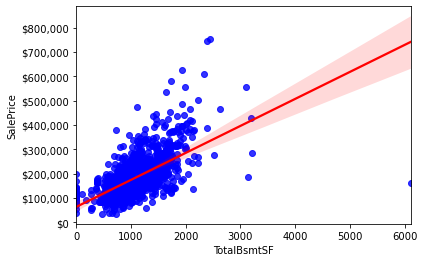

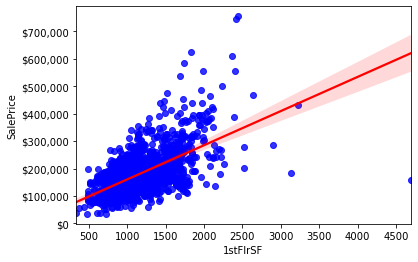

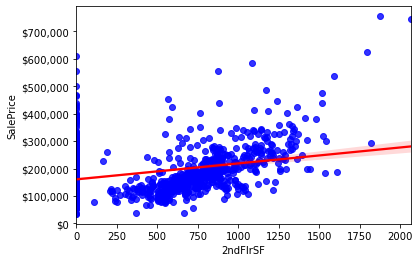

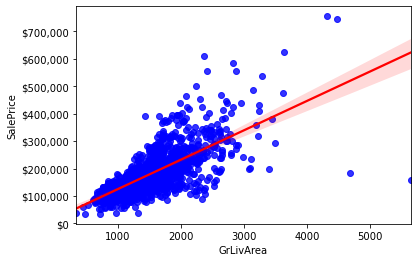

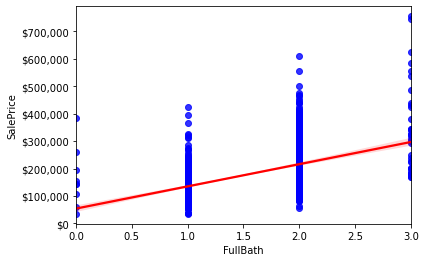

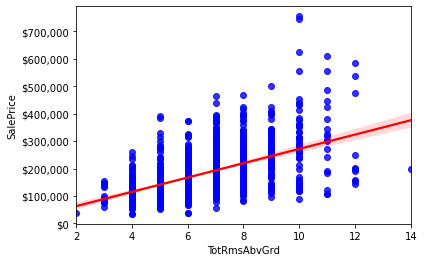

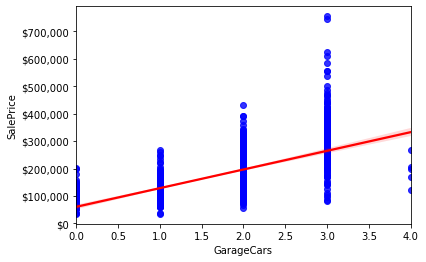

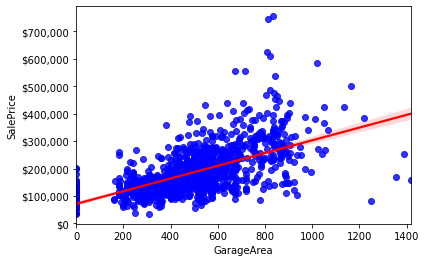

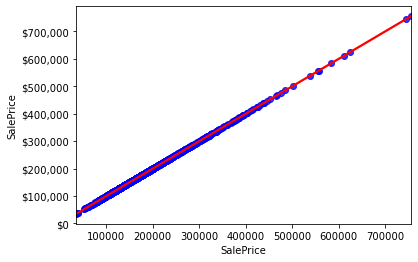

In [206]:
listreg = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] 

# On fait une figure par colonne 
for col in listreg:
    plt.figure()
    ax = sns.regplot(x=col, y="SalePrice", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    # on change le format de l'axe y
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 

### Affichage du jointplot

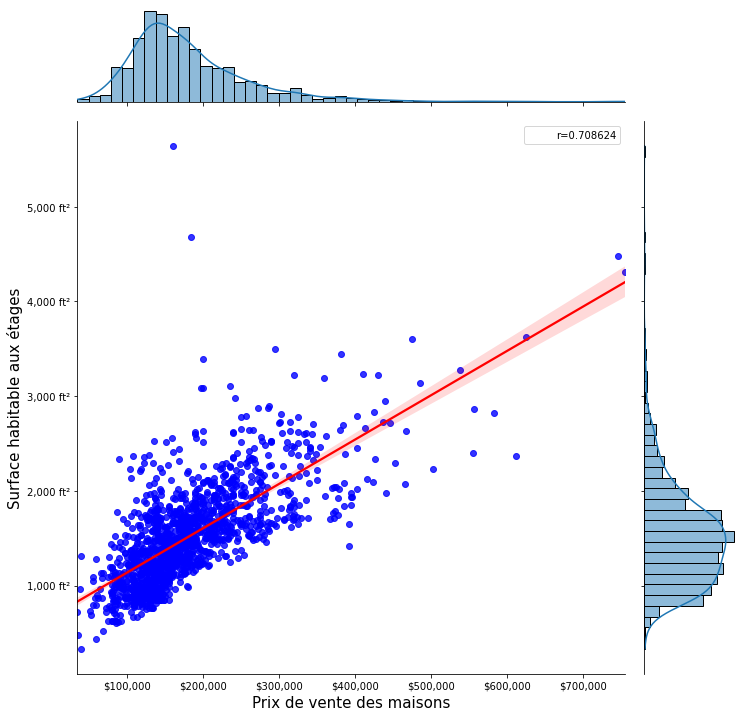

In [207]:
# On setup les dataframe
x=df['SalePrice']
y=df['GrLivArea']

ax = sns.jointplot(x = x, y = y, kind="reg", fit_reg = True, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, height=10);

# On calcule le coefficient de pearson
r = stats.pearsonr(x, y)[0]
# if you choose to write your own legend, then you should adjust the properties then
phantom, = ax.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
ax.ax_joint.legend([phantom],['r={:f}'.format(r)]);

# On modifie les noms des axes pour les rendre plus compréhensibles
plt.xlabel("Prix de vente des maisons", fontsize=15)
plt.ylabel("Surface habitable aux étages", fontsize=15)

# on change le format de l'axe x
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.ax_joint.xaxis.set_major_formatter(tick) 


# on change le format de l'axe y
fmt = '{x:,.0f} ft²'
tick = mtick.StrMethodFormatter(fmt)
ax.ax_joint.yaxis.set_major_formatter(tick) 

On voit que la corrélation entre le SalePrice et le GrLivArea est forte et que cette corrélation est linéaire. Le salaire et la superficie des étages est donc fortement correlée. 
On peut voir que les deux variables ont des densités proches et que ça se traduit par un nuage de point proche centré sur la ligne de régression linéaire. 

## Etude des valeurs qualitatives

### Identification des colonnes contenant les valeurs qualitatives

In [208]:
# On créé un dataframe contenant uniquement les valeurs qualitatives (donc les object)
dfquali=df.select_dtypes(include=[object])

### Utilisation de countplot

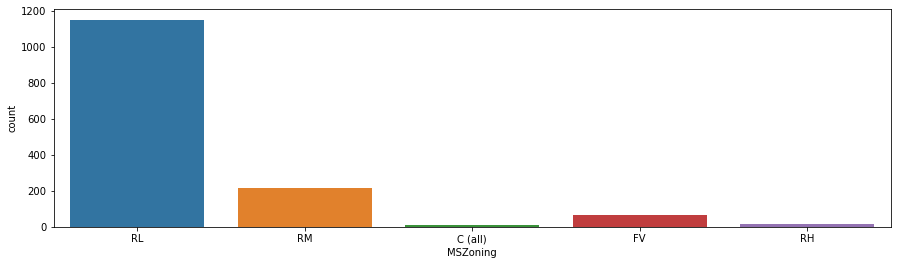

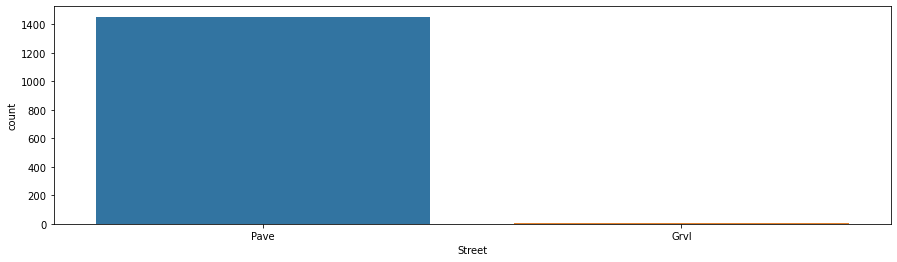

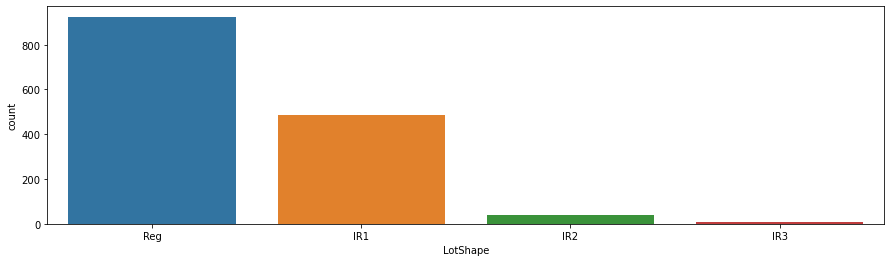

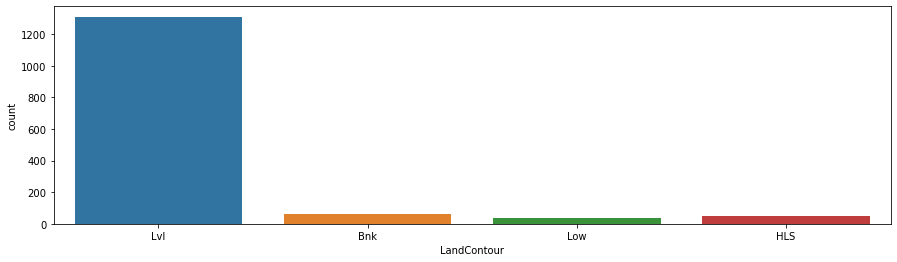

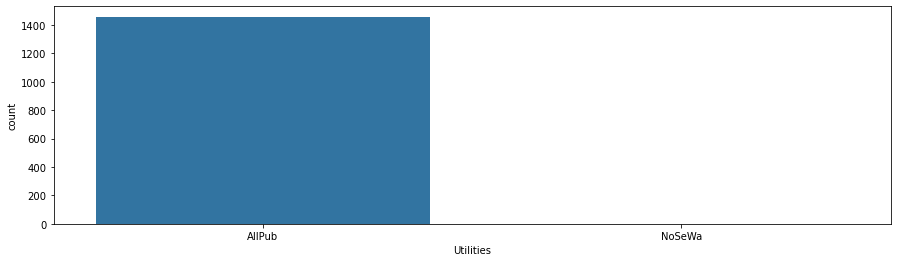

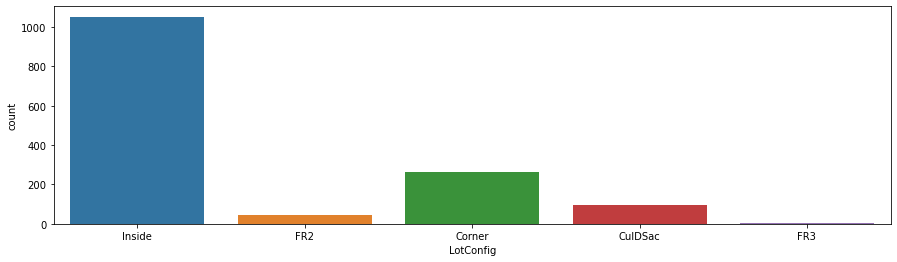

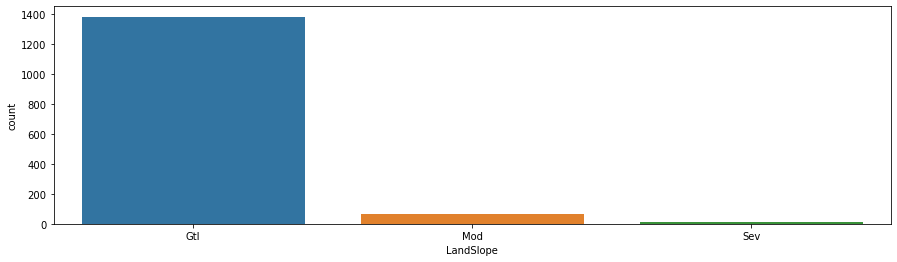

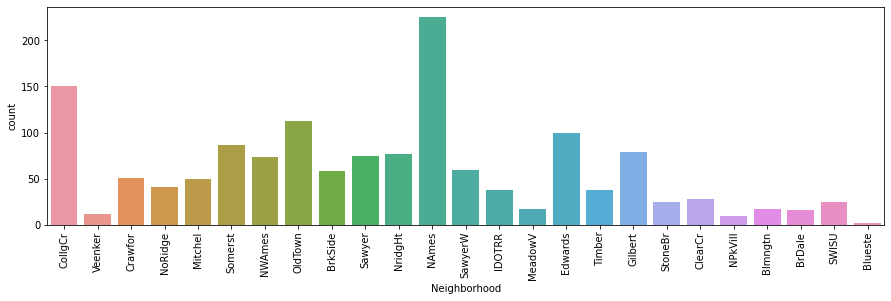

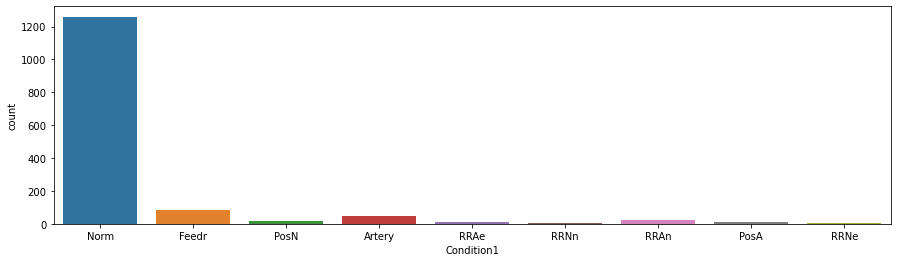

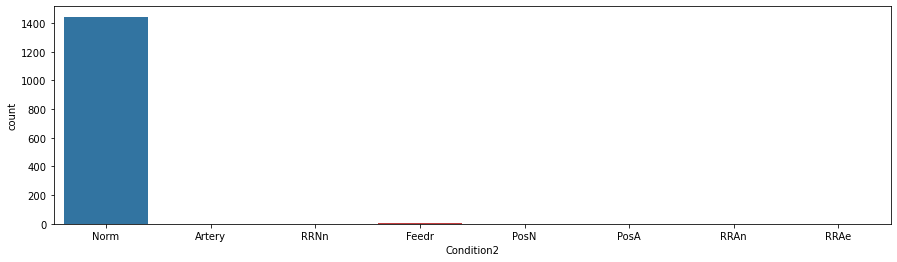

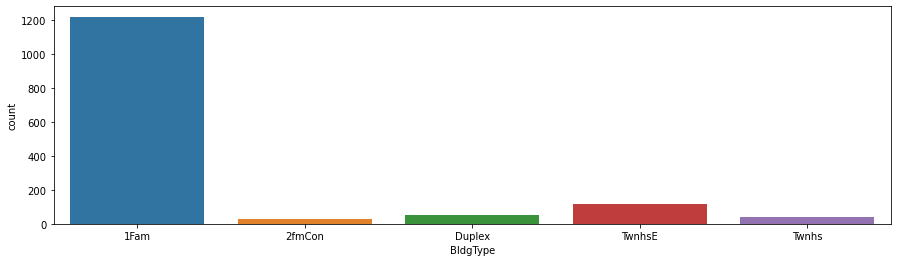

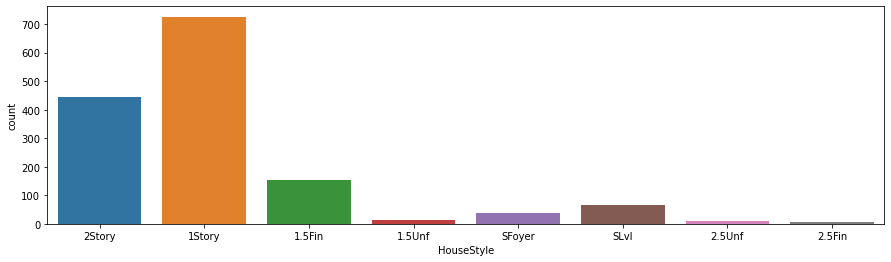

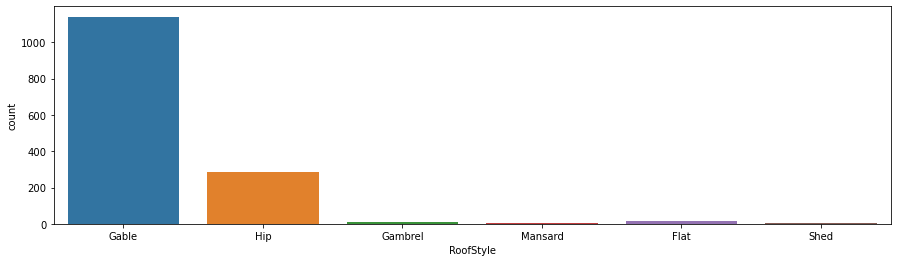

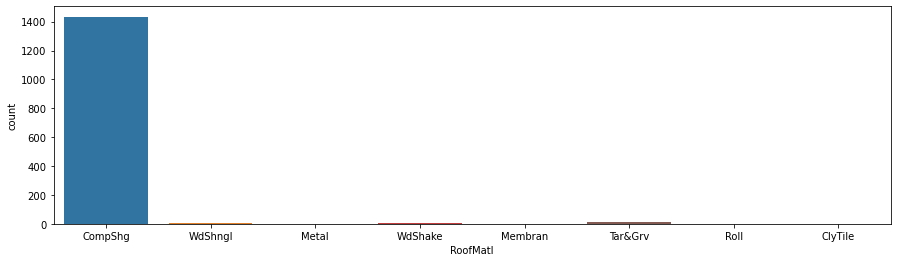

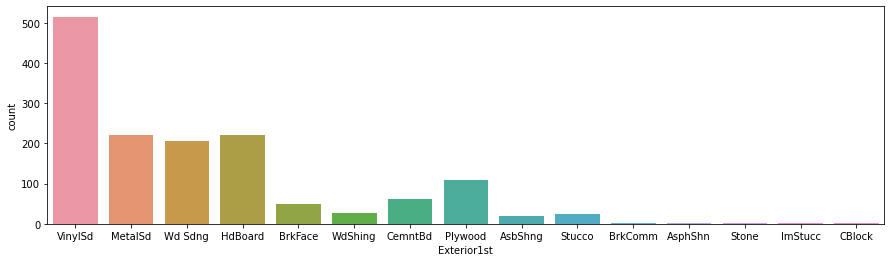

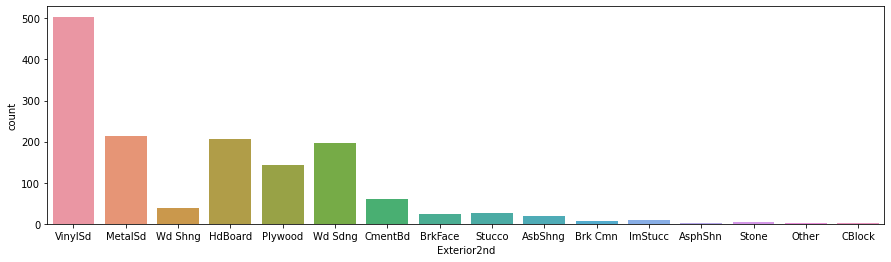

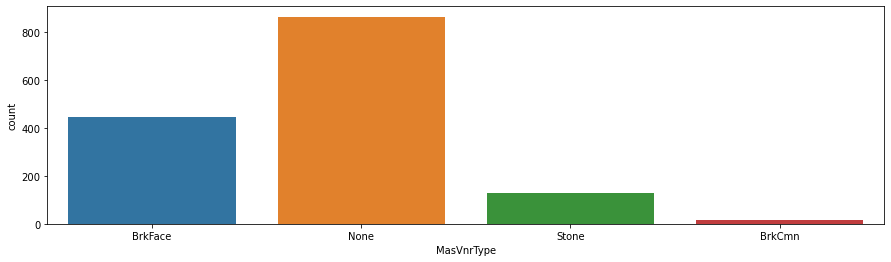

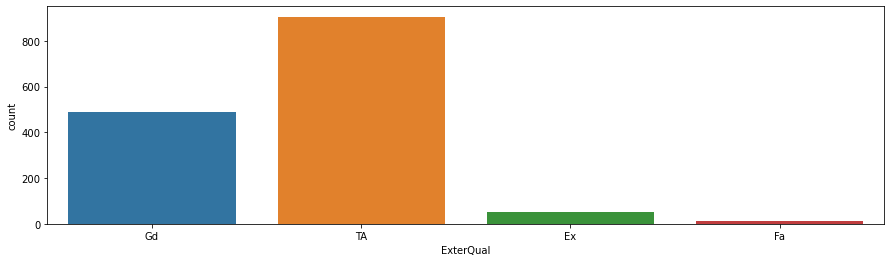

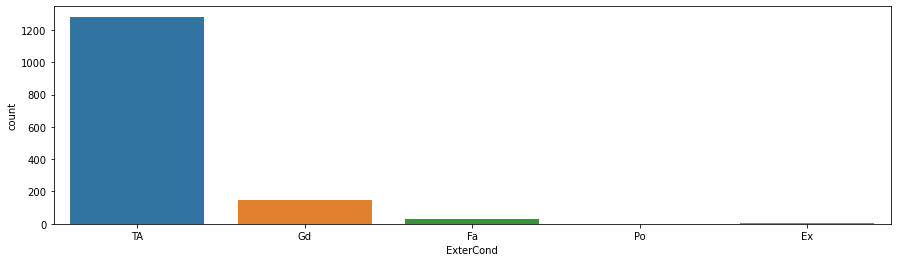

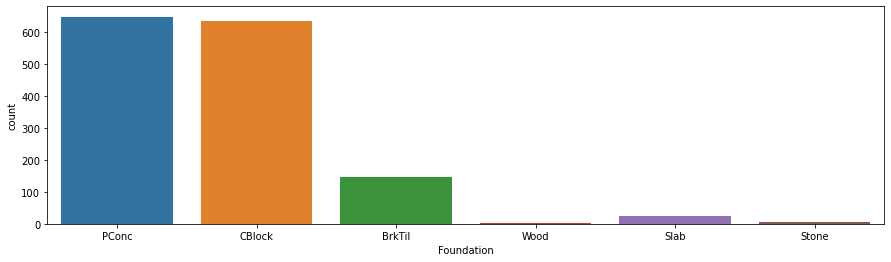

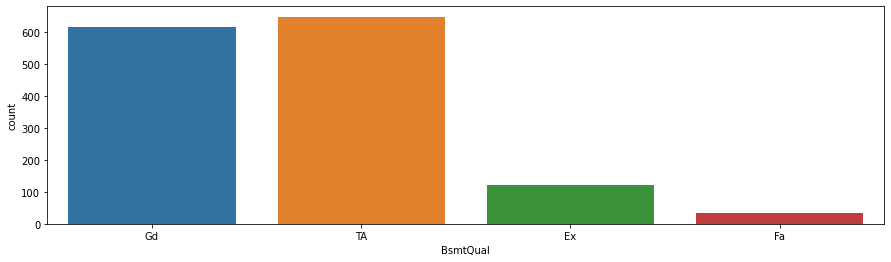

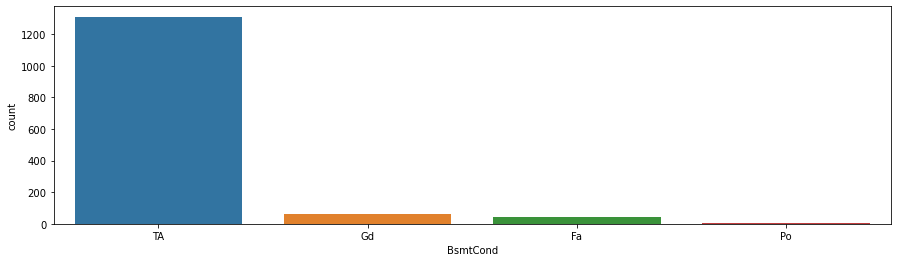

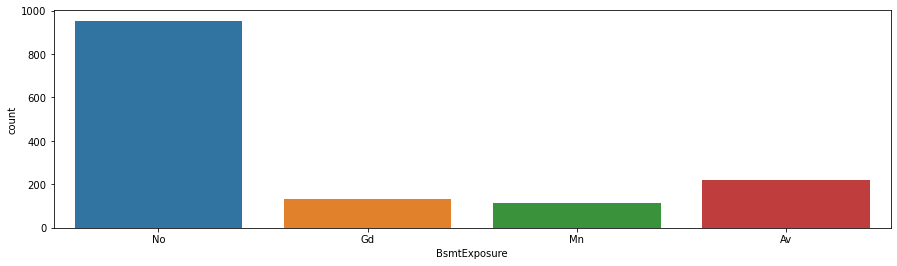

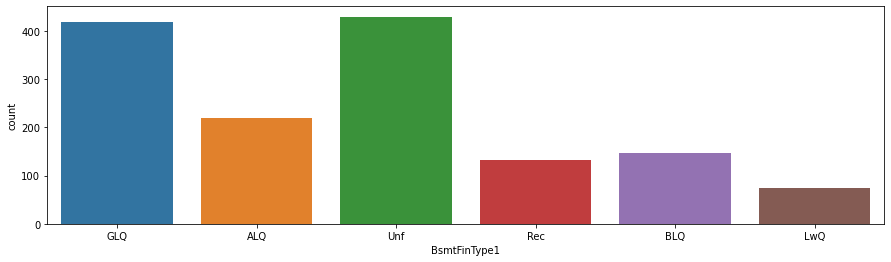

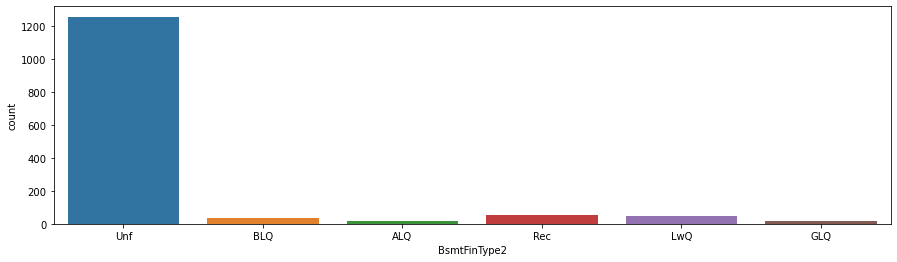

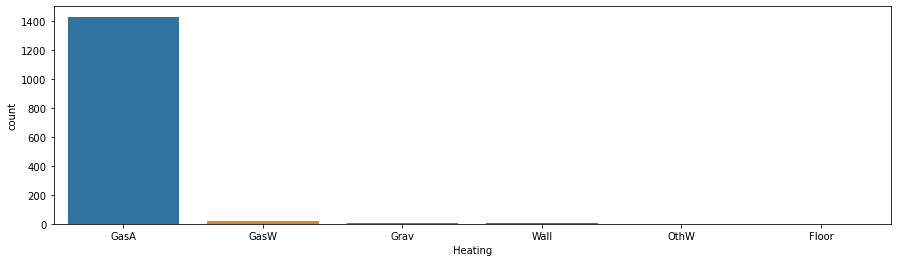

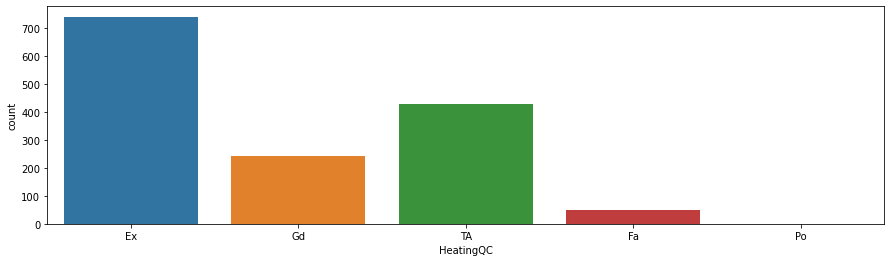

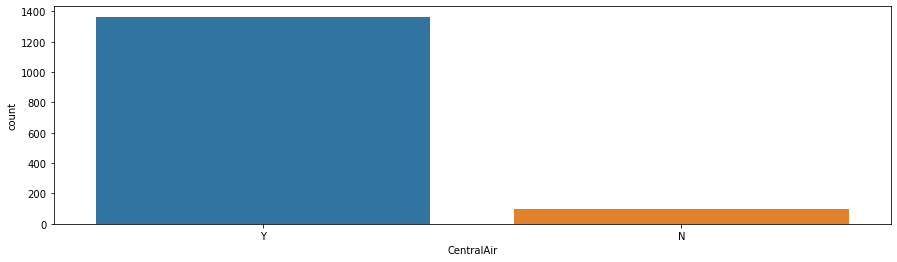

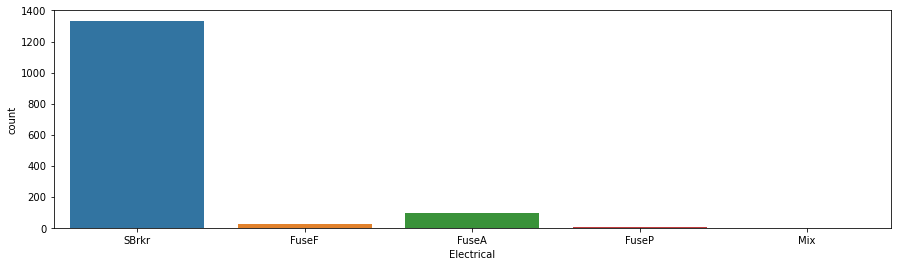

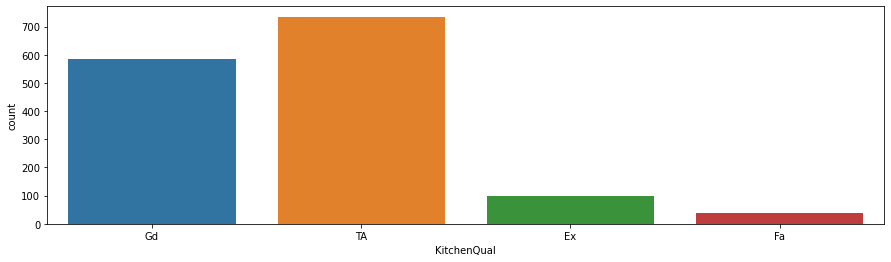

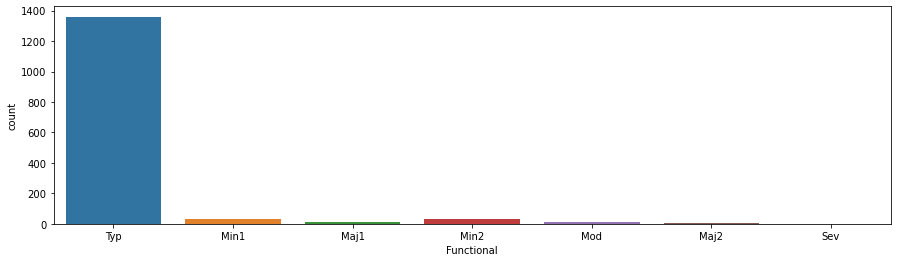

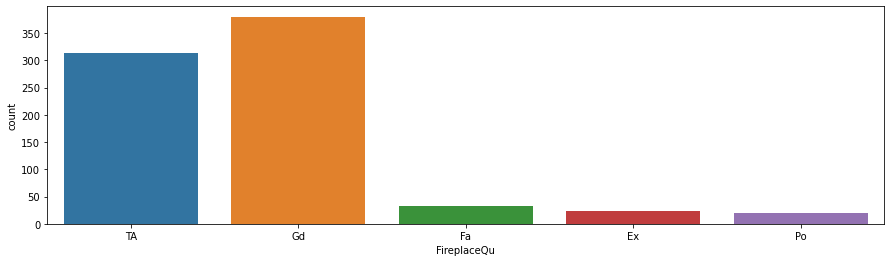

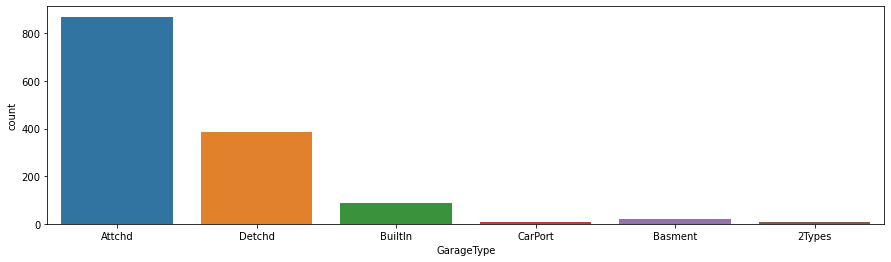

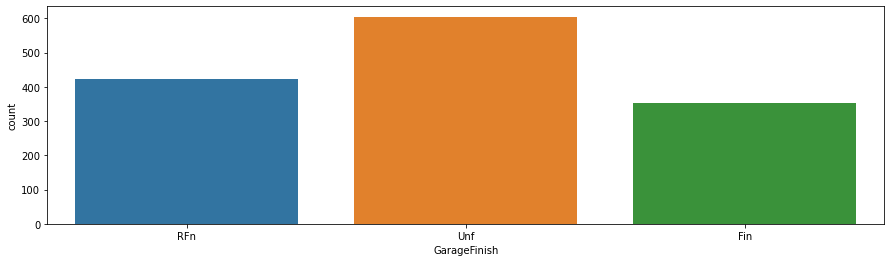

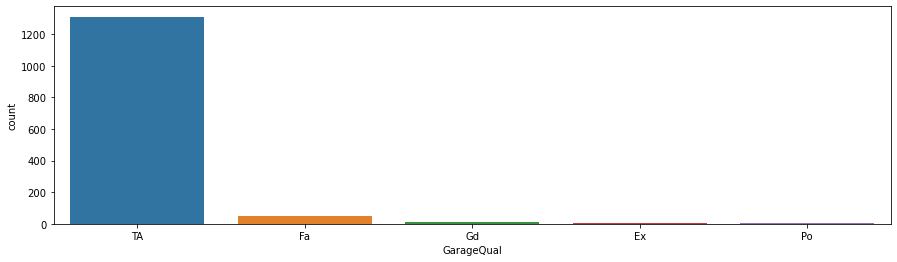

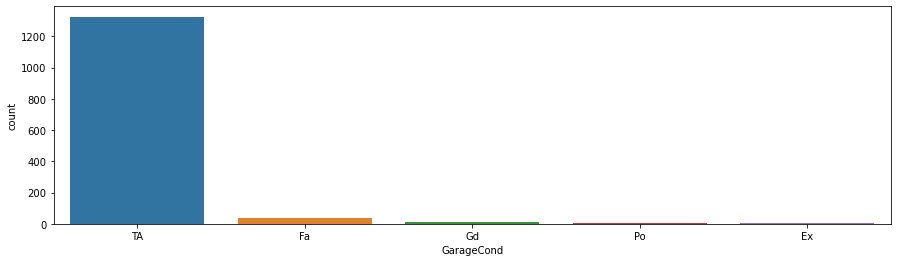

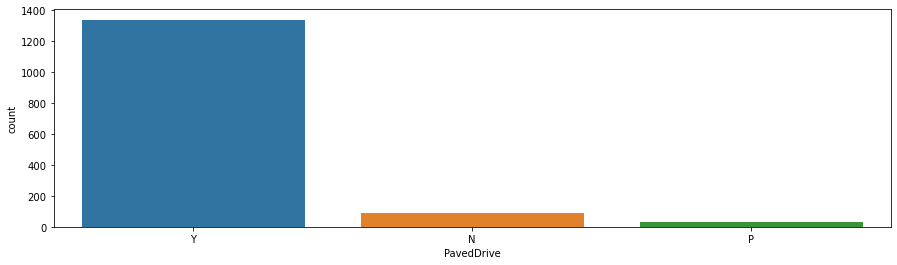

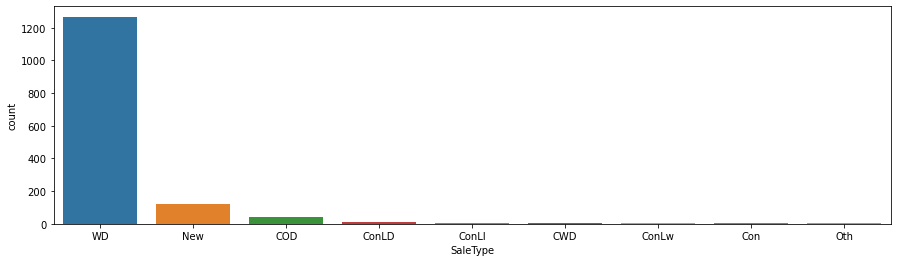

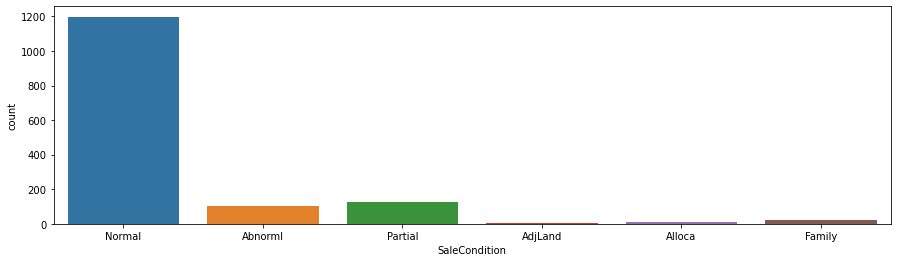

In [209]:
for col in dfquali.columns:
    plt.figure(figsize=(15,4))
    sns.countplot(x=df[col])
    if col == 'Neighborhood':
        plt.xticks(rotation=90)
    # Display the plot
    plt.show()
    # Close the current plot to stop retaining memory
    plt.close()
        

On a le nombre d'occurences de chaque valeurs pour chaque colonne. On peut voir quelle valeur est la plus représentée et dans quelle proportion, ce qui peut nous permettre de voir quelles sont les valeurs les plus pertinentes pour expliquer la différence entre les prix des maisons.

### Détermination des variables inutiles

Des variables telles que 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond' et 'PavedDrive' ne paraissent pas pertinentes pour expliquer le prix d'une maison. En effet, plus de 90% des maisons vendues ont la même valeur pour ces attributs. Ces attributs ne permettront donc pas de déterminer un lien entre le prix de la maison et eux. On va déterminer quelles colonnes sont dans cette situation où la valeur principale représente plus de 90% des occurences. 

In [210]:
linutile = []

# On parcourt nos colonnes de valeurs qualitatives
for col in dfquali.columns:
    # On extrait le nombre d'occurences maximal de la colonne
    highest = df[col].value_counts()[0]
    # On prélève la colonne si la même valeur est retrouvée plus de 90% du temps
    if highest/len(df) > 0.9:
        linutile.append(col)
        
print("Les colonnes qui ont plus de 90% de la même occurence sont :\n{}".format(linutile)) 

Les colonnes qui ont plus de 90% de la même occurence sont :
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


### Division du jeu de données en training/validation/testing sets

On va diviser le jeu de données en gardant 80% des valeurs pour l'entrainement et le reste pour le test. On va prendre 

In [211]:
dft = df

In [212]:
# # Données pour faire les expériences
X = dft[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']]
# Donnée à déterminer
y = dft["SalePrice"]

In [213]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

from sklearn.metrics import r2_score

### Machine learning : régression linéaire

On va réutiliser les variables les plus corrélées avec le prix de vente, tout en évitant de prendre des variables qui sont liées entre elles. 

In [214]:
# On entraine notre algorithme
reg = LinearRegression().fit(xtrain, ytrain)

# On conserve nos valeurs prédites
y_pred_reg = reg.predict(xtest)

In [215]:
# On créé un nombre aléatoire pour conserver le même sample tant qu'on le souhaite
r=rd.randint(0, 1000)

In [216]:
print(df[['SalePrice', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars']].sample(10, random_state=r))
print("Making predictions for the following 5 houses:")
print(xtest.sample(10, random_state=r))
print("The predictions are")
print(reg.predict(xtest.sample(10, random_state=r)))

      SalePrice  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  TotRmsAbvGrd  \
842      174900         1127      1165         0       1165             6   
289      153575          698       698       698       1396             7   
553      108000            0      1126         0       1126             5   
243      120000          626       626       591       1217             6   
410       60000         1276      1276         0       1276             5   
781      175900          761       810       793       1603             7   
1366     193000          873       882       908       1790             7   
1180     250000         1216      1298      1216       2514             8   
968       37900          600       600       368        968             6   
703      140000          360      1032       780       1812             8   

      GarageCars  
842            2  
289            1  
553            2  
243            1  
410            1  
781            2  
1366           2  


In [217]:
print("Les coefficients sont {}".format(list(reg.coef_)))

Les coefficients sont [22207.693553270707, 49.370250661394124, 38.85106778636273, 18.450786868949375, 17.060515904829973, 336.43822514555353]


In [218]:
ytrainpred = reg.predict(xtrain)
ytestpred = reg.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.767 alors que pour les données de test, il est de 0.767


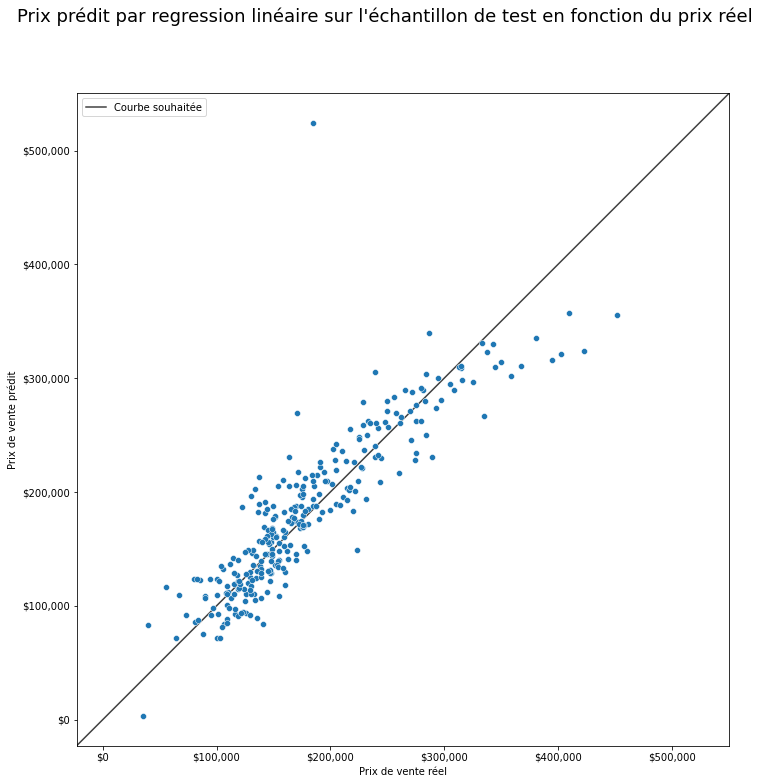

In [219]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par regression linéaire sur l'échantillon de test en fonction du prix réel", fontsize=18);

### Machine learning : régression linéaire Ridge

In [220]:
from sklearn.linear_model import Ridge

On va déterminer quel alpha donne le score le plus élevé

In [221]:
alphas = [10**x for x in range(-9, 10)]

In [222]:
scores = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(xtrain,ytrain)
    ytestpred = clf.predict(xtest)
    scores.append(r2_score(ytest, ytestpred))
max_id = scores.index(max(scores))

On utilise le alpha qui donne le meilleur coefficient de détermination sur l'échantillon de test.

In [223]:
clf = Ridge(alpha=alphas[max_id])
clf.fit(xtrain,ytrain);
print("Le alpha est de {}".format(alphas[max_id]))
print("Les coefficients sont {}".format(list(clf.coef_)))

ytrainpred = clf.predict(xtrain)
ytestpred = clf.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Le alpha est de 100
Les coefficients sont [19965.893500389036, 51.874863378485465, 40.76868302372127, 20.223317884665985, 15.912055042597375, 374.76359916592276]
Pour les données d'entrainement le R2 vaut 0.767 alors que pour les données de test, il est de 0.769


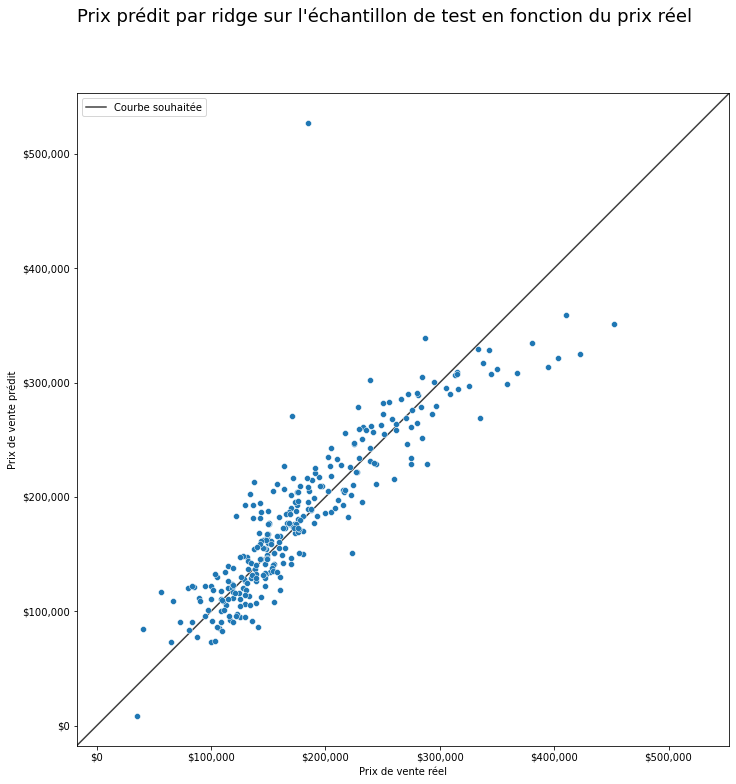

In [224]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par ridge sur l'échantillon de test en fonction du prix réel", fontsize=18);

### Machin learning : régression linéaire lasso

In [225]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

On va déterminer quel alpha donne le score le plus élevé

In [226]:
alphas = [10**x for x in range(-9, 10)]

In [227]:
scores = []
for alpha in alphas:
    clf = Lasso(alpha=alpha)
    clf.fit(xtrain, ytrain)
    ytestpred = clf.predict(xtest)
    scores.append(r2_score(ytest, ytestpred))
max_id = scores.index(max(scores))

On utilise le alpha qui donne le meilleur coefficient de détermination sur l'échantillon de test.

In [228]:
clf = Lasso(alpha=alphas[max_id])
clf.fit(xtrain, ytrain);
print("Le alpha est de {}".format(alphas[max_id]))
print("Les coefficients sont {}".format(list(clf.coef_)))

ytrainpred = clf.predict(xtrain)
ytestpred = clf.predict(xtest)
print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))
print("La RMSE est de {}".format(mean_squared_error(ytest, ytestpred, squared=False)))

Le alpha est de 1000
Les coefficients sont [20920.847156242224, 50.80406274289674, 40.01570988411497, 19.510949080319044, 16.372190446488286, 356.99601477238656]
Pour les données d'entrainement le R2 vaut 0.767 alors que pour les données de test, il est de 0.769
La RMSE est de 34388.85747733324


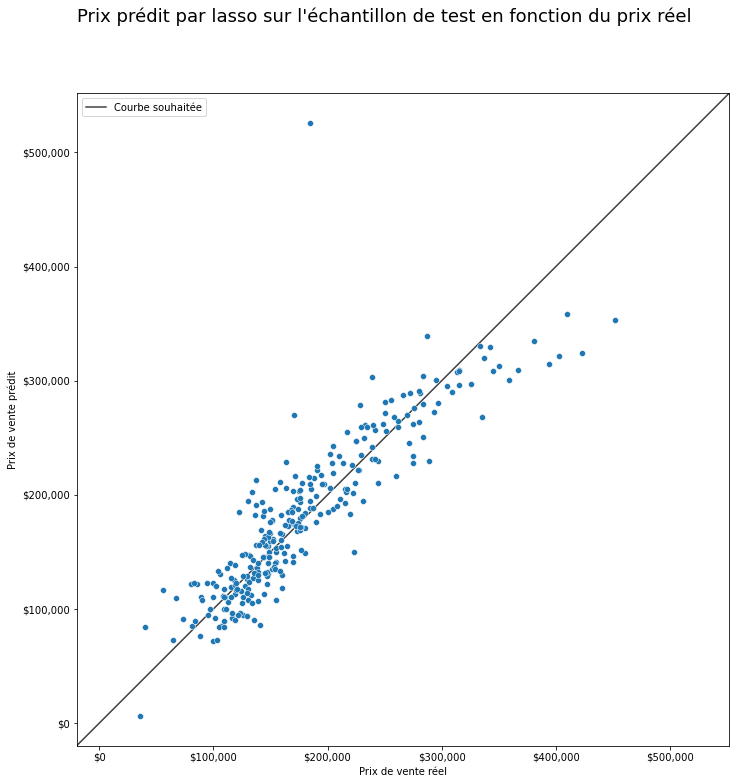

In [229]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par lasso sur l'échantillon de test en fonction du prix réel", fontsize=18);


## Conclusion

Dans notre situation, en s'ajustant sur le coefficient de détermination, on observe que les 3 modèles de régression linéaire ont les mêmes résultats. 

## Modèle linéaire avec les variables catégorielles

In [230]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder 

### Listage des variables catégorielles

In [231]:
dft=df[df.columns.difference(linutile)]
# dft=df

In [232]:
dft.index

RangeIndex(start=0, stop=1460, step=1)

In [233]:
def list_var_catg(df, thresh = 0.1):
    """
    Take a dataframe and an optional threshold (limit ratio) (default = 0.1)
    Return a list of column name that are categorial
    """
    var_catg = []
    for column in df.columns:
        if (len(df[column].unique())/df[column].count()) <= thresh:
            var_catg.append(column)
    return var_catg

In [234]:
catg = list_var_catg(dft)

### Encodage des valeurs qualitatives textuelles

In [235]:
def encoding(data):
    """
    Take a dataframe
    Return a dataframe containing the HotOneEncoded categorial columns from given dataframe
    """
    X = pd.DataFrame()
    le = LabelEncoder()
    for column in data.select_dtypes(include=[int, float]).columns:
        X[column] = data[column]
    for column in data.select_dtypes(include=[object]).columns:
        X = pd.concat([X, pd.get_dummies(df[column])], axis=1)
    return X

In [236]:
df_catg = encoding(dft[catg])

In [237]:
df_catg.shape

(1460, 213)

### Choix des variables explicatives

In [238]:
X = pd.concat([df_catg, df[df.columns.difference(catg).difference(linutile).difference(['SalePrice', 'Id'])]], axis=1)
# X = pd.concat([df_catg, df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']]], axis=1)

In [239]:
X.dropna(axis=1, inplace=True)

In [240]:
# Donnée à déterminer
y = dft["SalePrice"]

### Mise en place du set de test et d'entrainement

In [241]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

### Régression linéaire simple

In [242]:
# On entraine notre algorithme
reg = LinearRegression().fit(xtrain, ytrain)

# On conserve nos valeurs prédites
y_pred_reg = reg.predict(xtest)

In [243]:
ytrainpred = reg.predict(xtrain)
ytestpred = reg.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.893 alors que pour les données de test, il est de 0.863


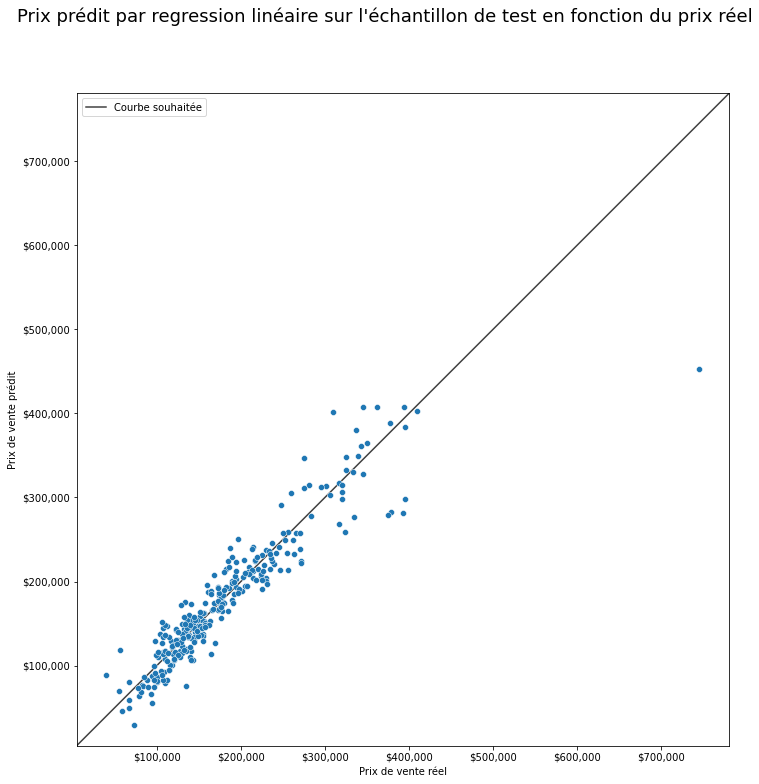

In [244]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par regression linéaire sur l'échantillon de test en fonction du prix réel", fontsize=18);

### Machine learning : régression linéaire Ridge

In [245]:
from sklearn.linear_model import Ridge

On va déterminer quel alpha donne le score le plus élevé

In [246]:
alphas = [10**x for x in np.arange(0, 5, 0.25)]

In [247]:
scores = []
for alpha in alphas:
    clf = Ridge(alpha=alpha, normalize=True)
    clf.fit(xtrain,ytrain)
    ytestpred = clf.predict(xtest)
    scores.append(r2_score(ytest, ytestpred))
max_id = scores.index(max(scores))

On utilise le alpha qui donne le meilleur coefficient de détermination sur l'échantillon de test.

In [248]:
clf = Ridge(alpha=alphas[max_id])
clf.fit(xtrain,ytrain);
print("Le alpha est de {}".format(alphas[max_id]))

ytrainpred = clf.predict(xtrain)
ytestpred = clf.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Le alpha est de 1.0
Pour les données d'entrainement le R2 vaut 0.893 alors que pour les données de test, il est de 0.871


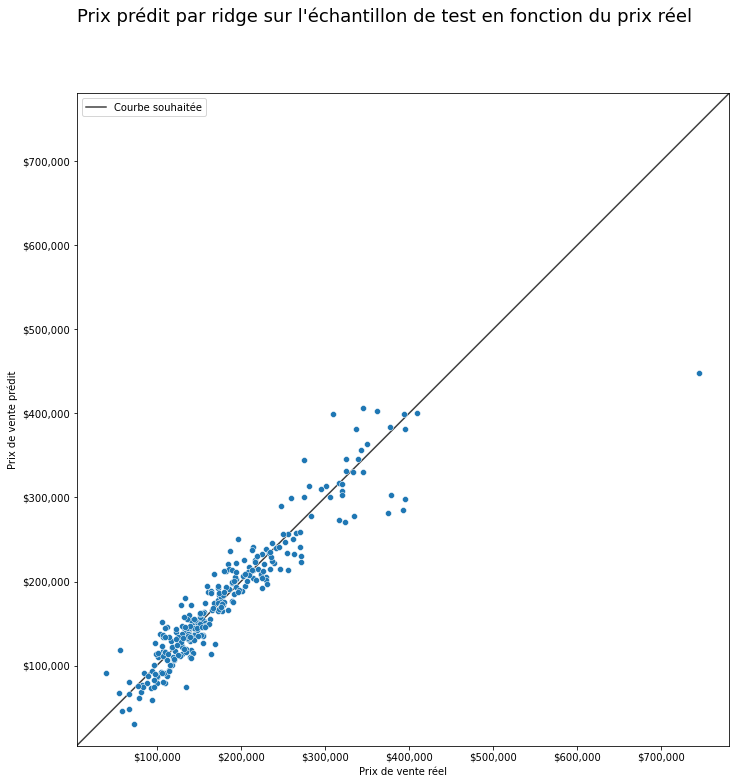

In [249]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par ridge sur l'échantillon de test en fonction du prix réel", fontsize=18);

### Machin learning : régression linéaire lasso

In [250]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

On va déterminer quel alpha donne le score le plus élevé

In [251]:
alphas = [10**x for x in np.arange(0, 5, 0.25)]

In [252]:
scores = []
for alpha in alphas:
    clf = Lasso(alpha=alpha)
    clf.fit(xtrain, ytrain)
    ytestpred = clf.predict(xtest)
    scores.append(r2_score(ytest, ytestpred))
max_id = scores.index(max(scores))

/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350913749961.96265, tolerance: 727541544.9049835
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310991466116.30835, tolerance: 727541544.9049835
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306251145491.77795, tolerance: 727541544.9049835
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

On utilise le alpha qui donne le meilleur coefficient de détermination sur l'échantillon de test.

In [253]:
clf = Lasso(alpha=alphas[max_id])
clf.fit(xtrain, ytrain);
print("Le alpha est de {}".format(alphas[max_id]))

ytrainpred = clf.predict(xtrain)
ytestpred = clf.predict(xtest)
print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))
print("La RMSE est de {}".format(mean_squared_error(ytest, ytestpred, squared=False)))

Le alpha est de 177.82794100389228
Pour les données d'entrainement le R2 vaut 0.878 alors que pour les données de test, il est de 0.886
La RMSE est de 27432.532700078737


/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260555445580.42444, tolerance: 727541544.9049835
  model = cd_fast.enet_coordinate_descent(


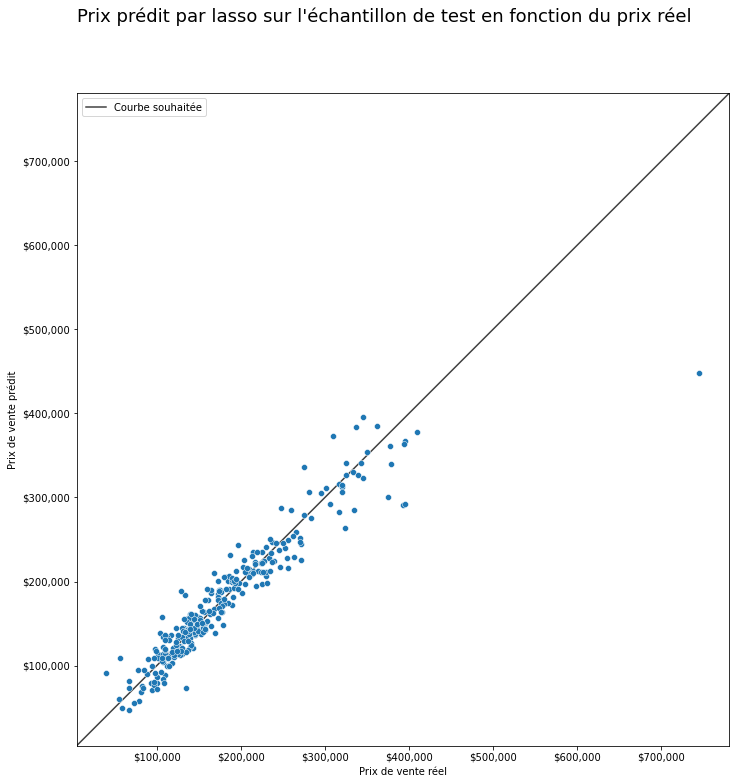

In [254]:
ax = sns.scatterplot(x=ytest, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par lasso sur l'échantillon de test en fonction du prix réel", fontsize=18);


## Conclusion

On observe que le modèle est plus efficace en prenant toutes les données. Il faudrait tout de même retirer les données non pertinentes des variables explicatives. De plus, les modèles de regression linéaire de ridge et de lasso permettent de mettre en place des modèles plus robustes, ils seront donc préférés au modèle de régression linéaire simple. 

## Cross-validation 

In [255]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import svm


### Mise en place du set de test et d'entrainement

In [256]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [257]:
from sklearn.model_selection import GridSearchCV

def get_best_alpha_gs(model, X, y, alphas, normalize = True, results = False):
    """
    Take model (Lasso, ridge, ...), X : explicative values, y : target values
    Return the model with the best parameters with gridsearch
    Display the params values and the results if specified
    """
    params = {"alpha" : alphas, "normalize" : normalize}
    clf = GridSearchCV(model, params)
    clf.fit(X, y)
    if results:
        print(clf.cv_results_)    
    print(clf.best_estimator_)
    print(clf.best_params_)
    return clf

In [258]:
alphas = [49+10*x for x in range(11)]

LassoCV = get_best_alpha_gs(Lasso(), X, y, alphas, normalize = [True, False])

/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333726184496.371, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170723512585.92517, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222985193647.2926, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247581637033.48618, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423996159149.407, tolerance: 770619031.1834062
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48866967892.10339, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Lasso(alpha=109)
{'alpha': 109, 'normalize': False}


/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54025248671.19281, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317101668274.8534, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(


In [259]:
ytestpred = LassoCV.predict(X)

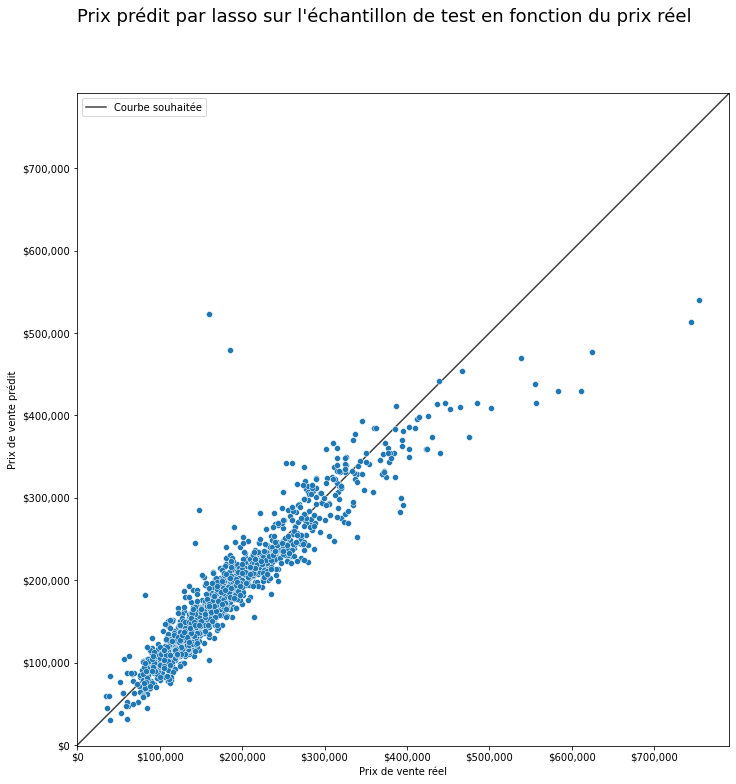

In [260]:
ax = sns.scatterplot(x=y, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par lasso sur l'échantillon de test en fonction du prix réel", fontsize=18);

### RandomizedSearch

In [261]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


def get_best_alpha_rs(model, X, y, alpha, normalize = [False], n_iter = 10, results = False):
    """
    Take model (Lasso, ridge, ...), X : explicative values, y : target values
    Return the model with the best parameters with gridsearch
    Display the params values and the results if specified
    """
    # Take random alphas between loc and loc+scale
    params = {"alpha" : uniform(loc=alpha[0], scale=alpha[1]), "normalize" : normalize}
    clf = RandomizedSearchCV(model, params, n_iter = n_iter)
    clf.fit(X, y)
    if results:
        print(clf.cv_results_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    return clf

In [262]:
alpha = [0, 200]

RidgeCV = get_best_alpha_rs(Ridge(), X, y, alpha, results=True)

{'mean_fit_time': array([0.00991383, 0.00768242, 0.00867052, 0.01190643, 0.01076488,
       0.00618229, 0.00596271, 0.00735574, 0.00745549, 0.0083272 ]), 'std_fit_time': array([0.00140312, 0.0007537 , 0.00179172, 0.00100877, 0.00143827,
       0.00023312, 0.00032051, 0.00151539, 0.00108263, 0.00150605]), 'mean_score_time': array([0.00433669, 0.00311961, 0.00516973, 0.00398893, 0.0044035 ,
       0.00303645, 0.00346909, 0.0033145 , 0.00445237, 0.00416675]), 'std_score_time': array([0.00072685, 0.00020366, 0.00261216, 0.00083299, 0.0011599 ,
       0.00018582, 0.00093944, 0.00047938, 0.00127518, 0.0014458 ]), 'param_alpha': masked_array(data=[5.857919309981496, 153.0254557676656,
                   21.662504510667603, 97.40760248742681,
                   129.21899672550506, 174.36262656603824,
                   116.08735354665032, 189.70676955416775,
                   81.72242627183202, 59.20856441962965],
             mask=[False, False, False, False, False, False, False, False,
    

In [263]:
ytestpred = RidgeCV.predict(X)

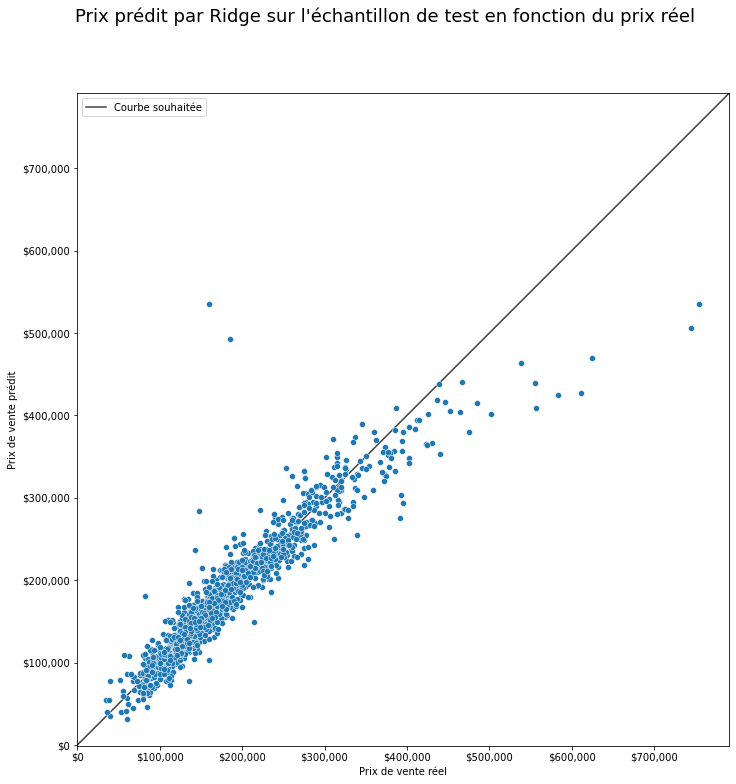

In [264]:
ax = sns.scatterplot(x=y, y=ytestpred);
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')

# on change le format de l'axe x et y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# On fait une ligne où y=x montrant la où on souhaiterait que les valeurs se situent
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Courbe souhaitée')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims);
plt.legend()

fig = plt.gcf()
fig.set_size_inches(20,12)
fig.suptitle("Prix prédit par Ridge sur l'échantillon de test en fonction du prix réel", fontsize=18);